In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
inspector = sqlalchemy.inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [11]:
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Climate Analysis

In [14]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database
#dt.datetime.strptime(allprcp[i][1],'%Y-%m-%d').date()
lastdatum = engine.execute("select prcp, max(date) from measurement;").fetchall()
lastdatum

[(0.0, '2017-08-23')]

In [16]:
lastday = lastdatum[0][1]
lastday

'2017-08-23'

In [20]:
firstday = ( dt.datetime.strptime(lastday,'%Y-%m-%d').date() -  pd.DateOffset(years=1) ).date()
firstday = firstday.strftime('%Y-%m-%d')
firstday

'2016-08-23'

In [28]:
# Perform a query to retrieve the data and precipitation scores
q = f'''
select prcp, date
from measurement;
'''
# where date between {firstday} and {lastday}
# '''

prcp_data = engine.execute(q).fetchall()
prcp_data

[(0.08, '2010-01-01'),
 (0.0, '2010-01-02'),
 (0.0, '2010-01-03'),
 (0.0, '2010-01-04'),
 (None, '2010-01-06'),
 (0.06, '2010-01-07'),
 (0.0, '2010-01-08'),
 (0.0, '2010-01-09'),
 (0.0, '2010-01-10'),
 (0.01, '2010-01-11'),
 (0.0, '2010-01-12'),
 (0.0, '2010-01-14'),
 (0.0, '2010-01-15'),
 (0.0, '2010-01-16'),
 (0.0, '2010-01-17'),
 (0.0, '2010-01-18'),
 (0.0, '2010-01-19'),
 (0.0, '2010-01-20'),
 (0.0, '2010-01-21'),
 (0.0, '2010-01-22'),
 (0.0, '2010-01-23'),
 (0.01, '2010-01-24'),
 (0.0, '2010-01-25'),
 (0.04, '2010-01-26'),
 (0.12, '2010-01-27'),
 (0.0, '2010-01-28'),
 (None, '2010-01-30'),
 (0.03, '2010-01-31'),
 (0.01, '2010-02-01'),
 (None, '2010-02-03'),
 (0.01, '2010-02-04'),
 (0.0, '2010-02-05'),
 (0.0, '2010-02-06'),
 (0.0, '2010-02-07'),
 (0.0, '2010-02-08'),
 (0.0, '2010-02-09'),
 (0.0, '2010-02-11'),
 (0.02, '2010-02-12'),
 (0.01, '2010-02-13'),
 (0.0, '2010-02-14'),
 (0.0, '2010-02-15'),
 (0.0, '2010-02-16'),
 (0.0, '2010-02-17'),
 (None, '2010-02-19'),
 (0.03, '2010-02-

In [30]:
last_year = []
for datum in prcp_data:
    day = dt.datetime.strptime(datum[1],'%Y-%m-%d').date()
    if day <= dt.datetime.strptime(lastday,'%Y-%m-%d').date() \
    and day > dt.datetime.strptime(firstday,'%Y-%m-%d').date() \
    and datum[0] != None:
        last_year.append(datum)
        
last_year

[(0.08, '2016-08-24'),
 (0.08, '2016-08-25'),
 (0.0, '2016-08-26'),
 (0.0, '2016-08-27'),
 (0.01, '2016-08-28'),
 (0.0, '2016-08-29'),
 (0.0, '2016-08-30'),
 (0.13, '2016-08-31'),
 (0.0, '2016-09-01'),
 (0.0, '2016-09-02'),
 (0.0, '2016-09-03'),
 (0.03, '2016-09-04'),
 (0.05, '2016-09-07'),
 (0.0, '2016-09-08'),
 (0.03, '2016-09-09'),
 (0.0, '2016-09-10'),
 (0.05, '2016-09-11'),
 (0.0, '2016-09-12'),
 (0.02, '2016-09-13'),
 (1.32, '2016-09-14'),
 (0.42, '2016-09-15'),
 (0.06, '2016-09-16'),
 (0.05, '2016-09-17'),
 (0.0, '2016-09-18'),
 (0.0, '2016-09-19'),
 (0.0, '2016-09-20'),
 (0.0, '2016-09-21'),
 (0.02, '2016-09-22'),
 (0.0, '2016-09-23'),
 (0.0, '2016-09-24'),
 (0.0, '2016-09-25'),
 (0.06, '2016-09-26'),
 (0.02, '2016-09-27'),
 (0.0, '2016-09-28'),
 (0.0, '2016-09-29'),
 (0.0, '2016-09-30'),
 (0.0, '2016-10-01'),
 (0.0, '2016-10-02'),
 (0.0, '2016-10-03'),
 (0.0, '2016-10-04'),
 (0.0, '2016-10-05'),
 (0.0, '2016-10-06'),
 (0.0, '2016-10-07'),
 (0.0, '2016-10-08'),
 (0.0, '2016-10-

In [36]:
# Save the query results as a Pandas DataFrame and set the index to the date column
year_df = pd.DataFrame(last_year)
year_df.columns = ['Precipitation', 'Date']
year_df

,Precipitation,Date
0,0.08,2016-08-24
1,0.08,2016-08-25
2,0.00,2016-08-26
3,0.00,2016-08-27
4,0.01,2016-08-28
...,...,...
2010,0.13,2017-08-17
2011,0.09,2017-08-19
2012,0.56,2017-08-21
2013,0.50,2017-08-22


In [37]:
# Sort the dataframe by date
year_df = year_df.groupby('Date').mean()
year_df

,Precipitation
Date,
2016-08-24,1.555000
2016-08-25,0.077143
2016-08-26,0.016667
2016-08-27,0.064000
2016-08-28,0.516667
...,...
2017-08-19,0.030000
2017-08-20,0.005000
2017-08-21,0.193333


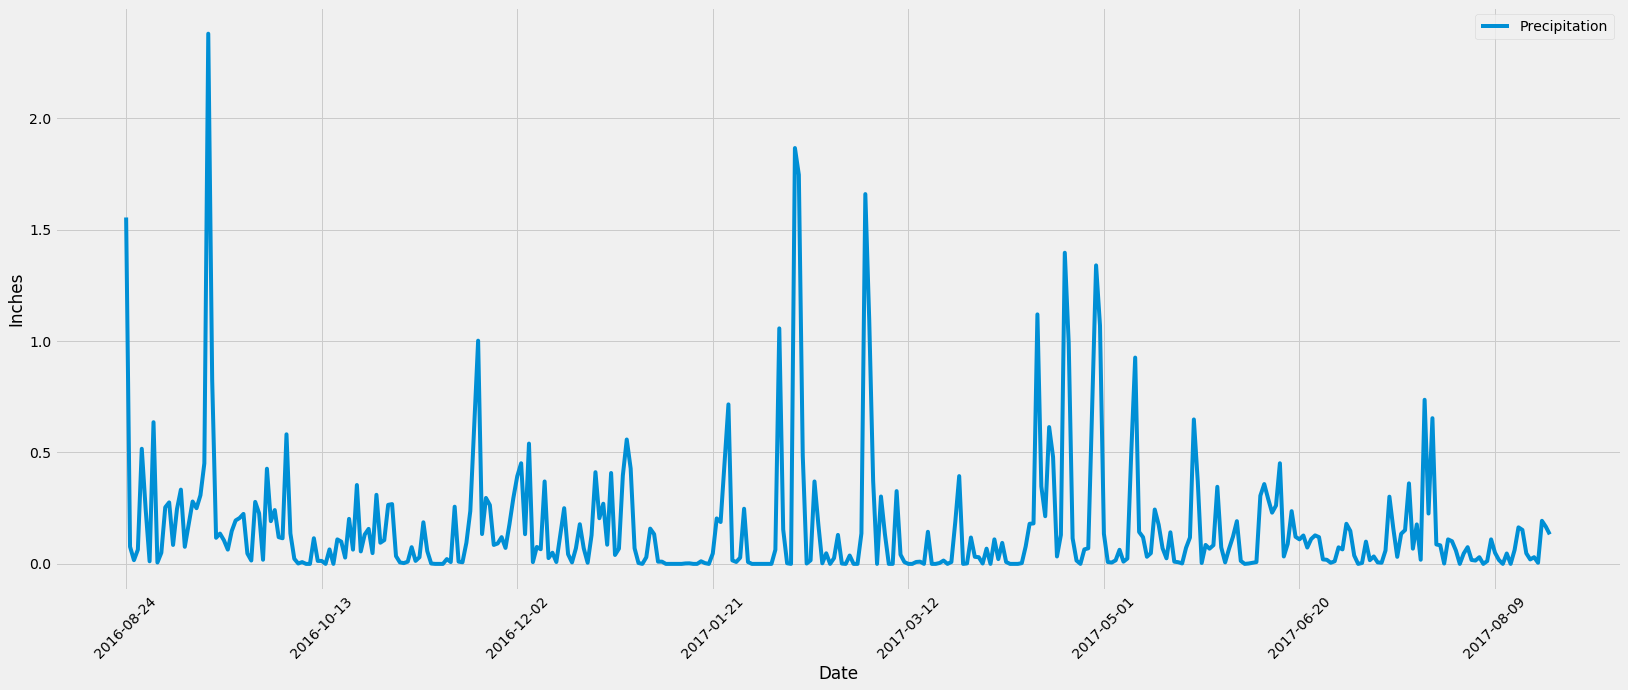

In [51]:
# Use Pandas Plotting with Matplotlib to plot the data
#fig, ax = plt.subplots(figsize=(40, 10))
year_df.plot(figsize=(25,10))
plt.xticks(rotation=45)
plt.ylabel('Inches')
plt.savefig('Precipitation.png')
plt.show()

In [43]:
# Use Pandas to calcualte the summary statistics for the precipitation data
year_df.describe()

,Precipitation
count,365.000000
mean,0.169987
std,0.295722
min,0.000000
25%,0.008571
50%,0.070000
75%,0.191667
max,2.380000


In [52]:
# Design a query to show how many stations are available in this dataset?
q = '''SELECT COUNT ( DISTINCT name ) AS "Number of stations" 
FROM station;'''
num_of_stations = engine.execute(q).fetchall()
num_of_stations

[(9,)]

In [99]:
q = '''SELECT station, name 
FROM station;'''
stations = engine.execute(q).fetchall()
stations#[0][1][:-7]

[('USC00519397', 'WAIKIKI 717.2, HI US'),
 ('USC00513117', 'KANEOHE 838.1, HI US'),
 ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US'),
 ('USC00517948', 'PEARL CITY, HI US'),
 ('USC00518838', 'UPPER WAHIAWA 874.3, HI US'),
 ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US'),
 ('USC00519281', 'WAIHEE 837.5, HI US'),
 ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US'),
 ('USC00516128', 'MANOA LYON ARBO 785.2, HI US')]

In [100]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
q = '''SELECT station, COUNT( station )
FROM measurement
GROUP BY station;'''
station_count = engine.execute(q).fetchall()
station_count

[('USC00511918', 1979),
 ('USC00513117', 2709),
 ('USC00514830', 2202),
 ('USC00516128', 2612),
 ('USC00517948', 1372),
 ('USC00518838', 511),
 ('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00519523', 2669)]

In [101]:
station_data = []
for station in stations:
    c = 0
    for count in station_count:
        if station[0] == count[0]:
            station_data.append([ station[1][:-7] , count[1], station[0] ])
            
station_df = pd.DataFrame(station_data)

In [102]:
station_df

,0,1,2
0,WAIKIKI 717.2,2724,USC00519397
1,KANEOHE 838.1,2709,USC00513117
2,KUALOA RANCH HEADQUARTERS 886.9,2202,USC00514830
3,PEARL CITY,1372,USC00517948
4,UPPER WAHIAWA 874.3,511,USC00518838
5,WAIMANALO EXPERIMENTAL FARM,2669,USC00519523
6,WAIHEE 837.5,2772,USC00519281
7,HONOLULU OBSERVATORY 702.2,1979,USC00511918
8,MANOA LYON ARBO 785.2,2612,USC00516128


In [103]:
station_df = station_df.sort_values(1, ascending=False)
station_df.columns = ['Name', 'Observances', 'Code']
station_df = station_df.set_index('Code')
station_df

,Name,Observances
Code,,
USC00519281,WAIHEE 837.5,2772
USC00519397,WAIKIKI 717.2,2724
USC00513117,KANEOHE 838.1,2709
USC00519523,WAIMANALO EXPERIMENTAL FARM,2669
USC00516128,MANOA LYON ARBO 785.2,2612
USC00514830,KUALOA RANCH HEADQUARTERS 886.9,2202
USC00511918,HONOLULU OBSERVATORY 702.2,1979
USC00517948,PEARL CITY,1372
USC00518838,UPPER WAHIAWA 874.3,511


In [118]:
big_station_index = station_df.index[0]
type(big_station_index)

str

In [131]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
q = f'''
SELECT MIN(tobs) AS "Lowest Temp", MAX(tobs) AS "Highest Temp", AVG(tobs) as "Average Temp"
FROM measurement
WHERE station = '{big_station_index}'
'''
# note quote marks around unpacked str
temp_data = engine.execute(q).fetchall()
temp_data = temp_data[0]
print(f'''At the Waihee weather station:
The all time low was {temp_data[0]} F.
The all time high was {temp_data[1]} F.
The average temperature was {round(temp_data[2],1)} F.''')

At the Waihee weather station:
The all time low was 54.0 F.
The all time high was 85.0 F.
The average temperature was 71.7 F.


In [133]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
q = f'''
SELECT tobs, date
FROM measurement
WHERE station = '{big_station_index}'
'''
temp = engine.execute(q).fetchall()
temp

temp_year = []
for datum in temp:
    day = dt.datetime.strptime(datum[1],'%Y-%m-%d').date()
    if day <= dt.datetime.strptime(lastday,'%Y-%m-%d').date() \
    and day > dt.datetime.strptime(firstday,'%Y-%m-%d').date() \
    and datum[0] != None:
        temp_year.append(datum)
        
temp_year

[(77.0, '2016-08-24'),
 (80.0, '2016-08-25'),
 (80.0, '2016-08-26'),
 (75.0, '2016-08-27'),
 (73.0, '2016-08-28'),
 (78.0, '2016-08-29'),
 (77.0, '2016-08-30'),
 (78.0, '2016-08-31'),
 (80.0, '2016-09-01'),
 (80.0, '2016-09-02'),
 (78.0, '2016-09-03'),
 (78.0, '2016-09-04'),
 (78.0, '2016-09-05'),
 (73.0, '2016-09-06'),
 (74.0, '2016-09-07'),
 (80.0, '2016-09-08'),
 (79.0, '2016-09-09'),
 (77.0, '2016-09-10'),
 (80.0, '2016-09-11'),
 (76.0, '2016-09-12'),
 (79.0, '2016-09-13'),
 (75.0, '2016-09-14'),
 (79.0, '2016-09-15'),
 (78.0, '2016-09-16'),
 (79.0, '2016-09-17'),
 (78.0, '2016-09-18'),
 (78.0, '2016-09-19'),
 (76.0, '2016-09-20'),
 (74.0, '2016-09-21'),
 (77.0, '2016-09-22'),
 (78.0, '2016-09-23'),
 (79.0, '2016-09-24'),
 (79.0, '2016-09-25'),
 (77.0, '2016-09-26'),
 (80.0, '2016-09-27'),
 (78.0, '2016-09-28'),
 (78.0, '2016-09-29'),
 (78.0, '2016-09-30'),
 (77.0, '2016-10-01'),
 (79.0, '2016-10-02'),
 (79.0, '2016-10-03'),
 (79.0, '2016-10-04'),
 (79.0, '2016-10-05'),
 (75.0, '20

In [141]:
temp_df = pd.DataFrame(temp_year)
temp_df.columns = ['Temp', 'Date']
temp_df = temp_df.groupby('Date').mean()
temp_df

,Temp
Date,
2016-08-24,77.0
2016-08-25,80.0
2016-08-26,80.0
2016-08-27,75.0
2016-08-28,73.0
...,...
2017-08-14,77.0
2017-08-15,77.0
2017-08-16,76.0


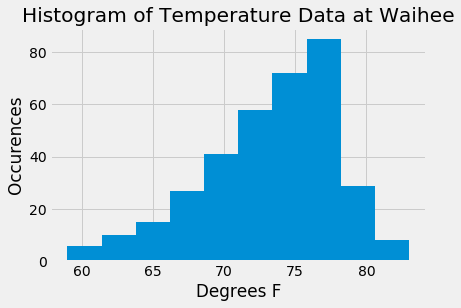

In [142]:
plt.hist(temp_df.Temp)
plt.xlabel('Degrees F')
plt.ylabel('Occurences')
plt.title('Histogram of Temperature Data at Waihee')
plt.savefig('waiheetemp.png')
plt.show()

## Bonus Challenge Assignment

In [125]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [126]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
